## Importing dataset and preprocessing


In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json

--2025-11-19 20:01:33--  https://storage.googleapis.com/tensorflow-1-public/course3/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.125.207, 142.250.157.207, 142.251.8.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.125.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json’

sarcasm.json        100%[===================>]   5.38M  5.18MB/s    in 1.0s    

2025-11-19 20:01:34 (5.18 MB/s) - ‘sarcasm.json’ saved [5643545/5643545]



In [3]:
data = pd.read_json("./sarcasm.json")
data.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['headline'], data['is_sarcastic'], test_size=0.2)

In [5]:
##define the parameters for the tokenizing and padding
vocab_size = 10000
embedding_dim = 16
max_length = 150
trunc_type='post'
oov_tok = "<OOV>"
pad_type ='post'

In [6]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_seq_pad = pad_sequences(X_train_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)
X_test_seq_pad = pad_sequences(X_test_seq, maxlen=max_length, truncating=trunc_type, padding=pad_type)


## Model


In [7]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [8]:
num_epochs = 10

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))


Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5612 - loss: 0.6858 - val_accuracy: 0.5580 - val_loss: 0.6771
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.6205 - loss: 0.6463 - val_accuracy: 0.7128 - val_loss: 0.5371
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7856 - loss: 0.4709 - val_accuracy: 0.7825 - val_loss: 0.4524
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8193 - loss: 0.3994 - val_accuracy: 0.8351 - val_loss: 0.3861
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8323 - loss: 0.3748 - val_accuracy: 0.8409 - val_loss: 0.3759
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8725 - loss: 0.3181 - val_accuracy: 0.8145 - val_loss: 0.3905
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8799 - loss: 0.2995 - val_accuracy: 0.8240 - val_loss: 0.3944
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8742 - loss: 0.2954 - val_accuracy: 0.

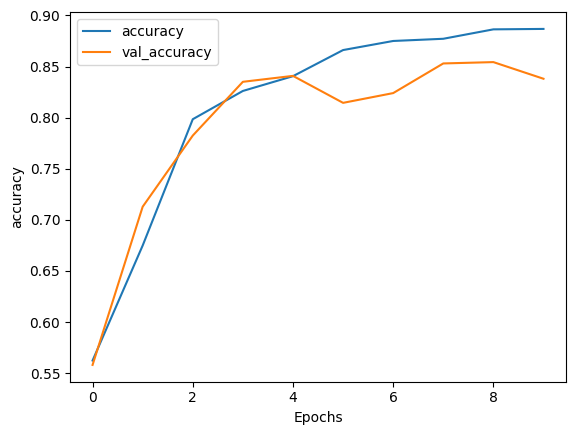

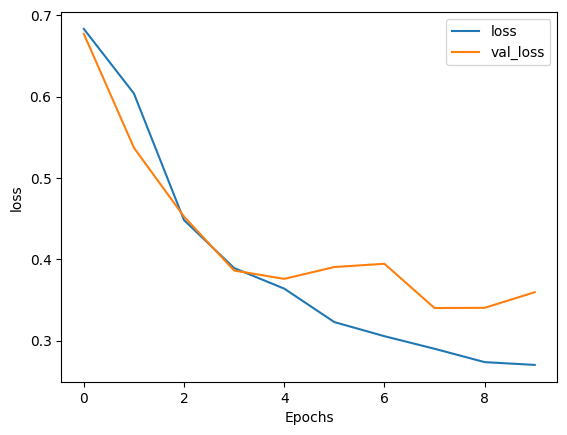

In [9]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [10]:
sentence = ["Great, it's Monday again"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
[[0.47997856]]


In [13]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
num_epochs = 10

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 142s 200ms/step - accuracy: 0.7076 - loss: 0.5241 - val_accuracy: 0.8519 - val_loss: 0.3294
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.9129 - loss: 0.2168 - val_accuracy: 0.8632 - val_loss: 0.3236
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 142s 201ms/step - accuracy: 0.9545 - loss: 0.1263 - val_accuracy: 0.8540 - val_loss: 0.3798
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 184s 264ms/step - accuracy: 0.9756 - loss: 0.0763 - val_accuracy: 0.8501 - val_loss: 0.4369
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 155s 232ms/step - accuracy: 0.9859 - loss: 0.0460 - val_accuracy: 0.8510 - val_loss: 0.5511
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 160s 239ms/step - accuracy: 0.9904 - loss: 0.0319 - val_accuracy: 0.8482 - val_loss: 0.5960
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 138s 207ms/step - accuracy: 0.9939 - loss: 0.0209 - val_accuracy: 0.8396 - val_loss: 0.6461
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 131s 196ms/step - accuracy: 0.9952 -

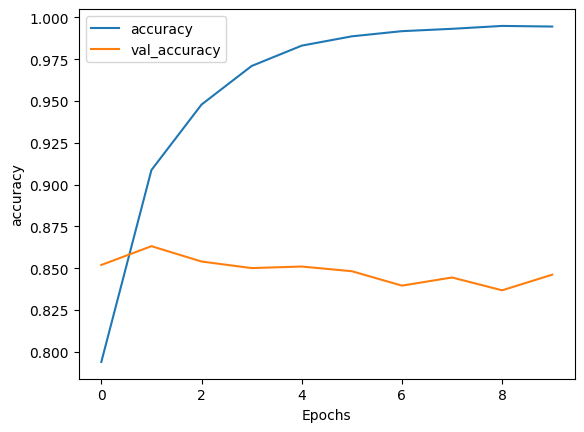

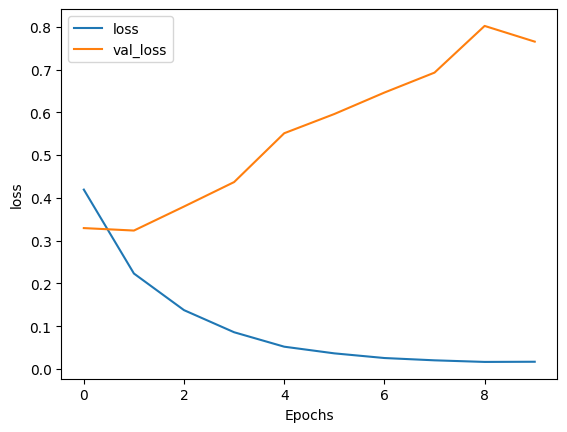

In [15]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [16]:
sentence = ["Great, it's Monday again"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 598ms/step
[[0.01121374]]


In [17]:
model = tf.keras.Sequential([
      tf.keras.layers.Embedding(vocab_size, embedding_dim),
      tf.keras.layers.Conv1D(64, 5, activation='relu'),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(24, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [20]:
num_epochs = 10

history = model.fit(X_train_seq_pad, y_train, epochs=num_epochs, validation_data=(X_test_seq_pad, y_test))

Epoch 1/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.6235 - loss: 0.6262 - val_accuracy: 0.8306 - val_loss: 0.3904
Epoch 2/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.8734 - loss: 0.3103 - val_accuracy: 0.8478 - val_loss: 0.3492
Epoch 3/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9196 - loss: 0.2083 - val_accuracy: 0.8493 - val_loss: 0.3551
Epoch 4/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9417 - loss: 0.1626 - val_accuracy: 0.8472 - val_loss: 0.3954
Epoch 5/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.9568 - loss: 0.1251 - val_accuracy: 0.8420 - val_loss: 0.4200
Epoch 6/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - accuracy: 0.9636 - loss: 0.1011 - val_accuracy: 0.8429 - val_loss: 0.4708
Epoch 7/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step - accuracy: 0.9755 - loss: 0.0772 - val_accuracy: 0.8420 - val_loss: 0.5120
Epoch 8/10
668/668 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9821 - loss: 0.0601 - val_acc

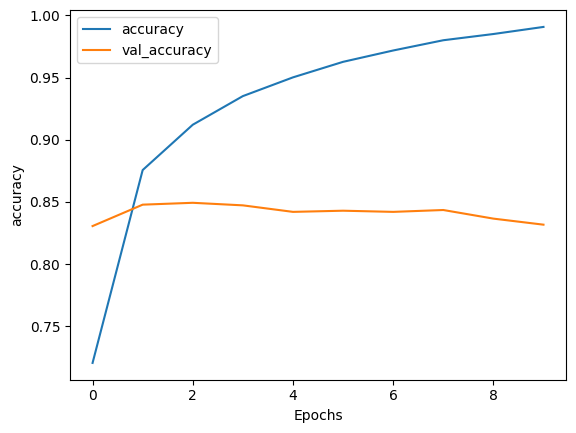

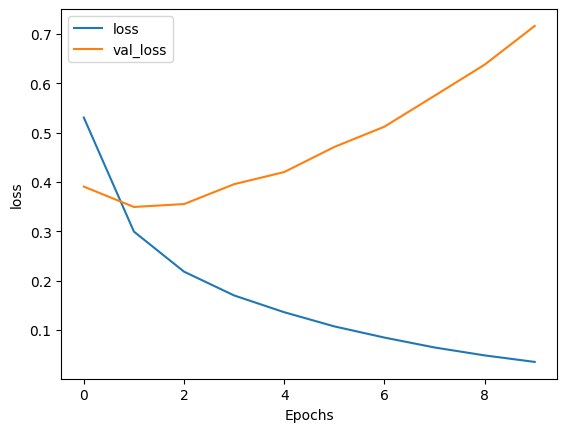

In [21]:
import matplotlib.pyplot as plt

##plot the scores from history
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.legend([string, 'val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [22]:
sentence = ["Great, it's Monday again"]

##prepare the sequences of the sentences in question
sequences = tokenizer.texts_to_sequences(sentence)
padded_seqs = pad_sequences(sequences, maxlen=max_length, padding=pad_type, truncating=trunc_type)

print(model.predict(padded_seqs))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
[[0.29807124]]
